# 성별 인구 데이터 그래프 그리기

In [23]:
import csv
import matplotlib.pyplot as plt
import platform
import math

## subplot 연습

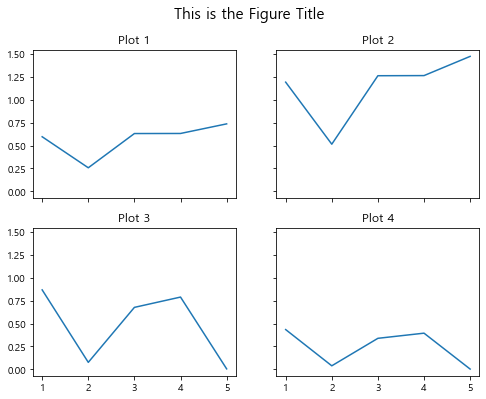

In [24]:
x = [1,2,3,4,5]
y1 = [0.59705847, 0.25786401, 0.63213726, 0.63287317, 0.73791151]
y2 = [1.19411694, 0.51572803, 1.26427451, 1.26574635, 1.47582302]
y3 = [0.86793828, 0.07563408, 0.67670068, 0.78932712, 0.0043694]
y4 = [0.43396914, 0.03781704, 0.33835034, 0.39466356, 0.0021847]

fig, axes = plt.subplots(2, 2, figsize=(8,6), sharex=True, sharey=True)
fig.suptitle('This is the Figure Title', fontsize=15)

# Top Left Subplot
plt.subplot(2, 2, 1)
plt.plot(x, y1)
plt.title('Plot 1')
# Top Right Subplot
plt.subplot(2, 2, 2)
plt.plot(x, y2)
plt.title("Plot 2")
# Bottom Left Subplot
plt.subplot(2, 2, 3)
plt.plot(x, y3)
plt.title("Plot 3")
# Bottom Right Subplot
plt.subplot(2, 2, 4)
plt.plot(x, y4)
plt.title("Plot 4")
plt.show()

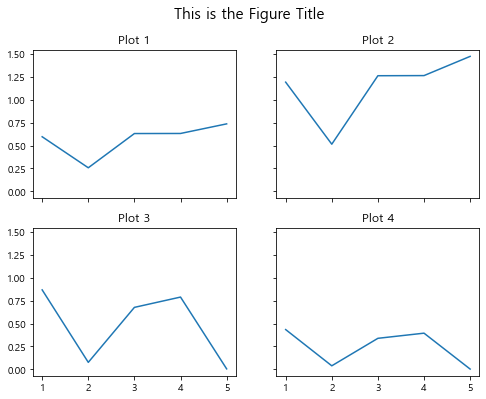

In [25]:
x = [1,2,3,4,5]
y1 = [0.59705847, 0.25786401, 0.63213726, 0.63287317, 0.73791151]
y2 = [1.19411694, 0.51572803, 1.26427451, 1.26574635, 1.47582302]
y3 = [0.86793828, 0.07563408, 0.67670068, 0.78932712, 0.0043694]
y4 = [0.43396914, 0.03781704, 0.33835034, 0.39466356, 0.0021847]

fig, axes = plt.subplots(2, 2, figsize=(8,6), sharex=True, sharey=True)
fig.suptitle('This is the Figure Title', fontsize=15)

axes[0,0].plot(x, y1)
axes[0,0].set_title("Plot 1")
# Top Right Subplot
axes[0,1].plot(x, y2)
axes[0,1].set_title("Plot 2")
# Bottom Left Subplot
axes[1,0].plot(x, y3)
axes[1,0].set_title("Plot 3")
# Bottom Right Subplot
axes[1,1].plot(x, y4)
axes[1,1].set_title("Plot 4")
plt.show()

## 특정 도시 인구 그래프

In [26]:
def draw_city_gender_pop(city):
    """도시 남녀 인구 그래프 그려주는 함수

    Args:
        city (str): 도시 이름    
    """
    f = open('../Data/gender.csv', encoding='euc_kr')
    data = csv.reader(f)
    
    male_list = []
    female_list = []

    for row in data:
        if city in row[0]:
            for i in range(106,207):
                male_list.append(int(row[i].replace(',', '')))
                female_list.append(int(row[i+103].replace(',', '')))
            break # 도시 하위 목록이 많음, 처음에 나오는 데이터가 전체 총 합
    f.close()

    if platform.system() == "Windows":
        plt.rc('font', family="Malgun Gothic")
    else:
        plt.rc('font', family="AppleGothic")

    color = ['cornflowerblue', 'tomato']
    plt.plot(male_list, label='남성', color=color[0])
    plt.plot(female_list, label='여성', color=color[1])
    plt.title(city + " 지역의 남녀 인구수 비교")
    plt.xlabel('나이')
    plt.ylabel('인구수')
    plt.legend()
    plt.show()

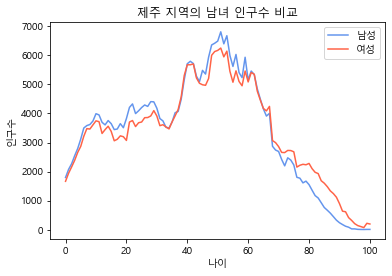

In [27]:
draw_city_gender_pop('제주')

## 여러 도시 인구 그래프
- 도시 순서때문에 파일 읽어들이면서 위치 초기화 해줘야 가능
- 여기서는 간단하게 순서를 맞춰 읽음

In [28]:
def draw_citys_gender_pop(city_list:list):
    """도시 리스트 성별 인구 그래프 그려주는 함수

    Args:
        city_list (list): 도시 리스트
    """
    f = open('../Data/gender.csv', encoding='euc_kr')
    data = csv.reader(f)

    for city in city_list:
        male_list = []
        female_list = []
        for row in data:
            if city in row[0]:
                for i in range(106,207):
                    male_list.append(int(row[i].replace(',', '')))
                    female_list.append(int(row[i+103].replace(',', '')))
                break # 도시 하위 목록이 많음, 처음에 나오는 데이터가 전체 총 합
        if platform.system() == "Windows":
            plt.rc('font', family="Malgun Gothic")
        else:
            plt.rc('font', family="AppleGothic")

        color = ['cornflowerblue', 'tomato']
        plt.plot(male_list, label='남성', color=color[0])
        plt.plot(female_list, label='여성', color=color[1])
        plt.title(city + " 지역의 남녀 인구수 비교")
        plt.xlabel('나이')
        plt.ylabel('인구수')
        plt.legend()
        plt.show()
    f.close()

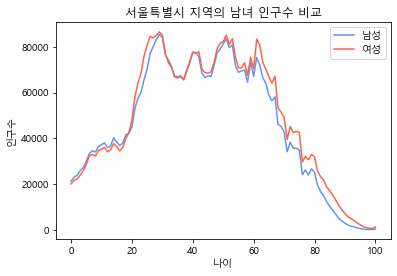

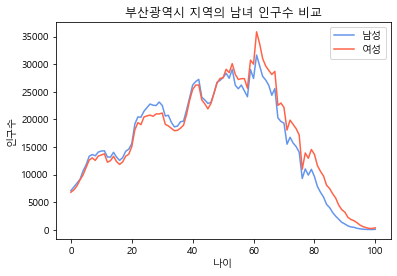

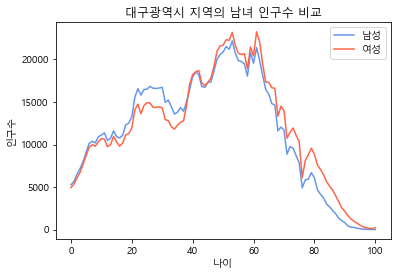

In [29]:
city_list = ['서울특별시', '부산광역시', '대구광역시']
draw_citys_gender_pop(city_list)

## 산점도 그리기

In [30]:
def draw_scatter(city, male_list, female_list, bubble_size_list):
    """산점도 그려주는 함수

    Args:
        city (str): 도시명
        male_list (list): 남자 인구수
        female_list (list): 여자 인구수
        bubble_size_list (list): 버블 사이즈
    """
    if platform.system() == "Windows":
        plt.rc("font", family="Malgun Gothic")
    else:
        plt.rc("font", family="AppleGothic")

    plt.figure(figsize=(8, 4), dpi=100)
    plt.scatter(male_list, female_list, s=bubble_size_list, c=range(101), alpha=0.5, cmap="jet")
    plt.colorbar()
    plt.plot(range(max(male_list)), range(max(male_list)), "g--")
    plt.title(city + "지역의 남녀 인구수 비교")
    plt.xlabel("남성 인구 수")
    plt.ylabel("여성 인구 수")
    plt.show()

In [31]:
def draw_city_gender_pop_bubble(city):
    """도시 남녀 인구 그래프 그려주는 함수

    Args:
        city (str): 도시 이름    
    """
    f = open('../Data/gender.csv', encoding='euc_kr')
    data = csv.reader(f)
    
    male_list = []
    female_list = []
    bubble_size_list = []

    for row in data:
        if city in row[0]:
            for i in range(106, 207):
                male_num = int(row[i].replace(',', ''))
                female_num = int(row[i+103].replace(',', ''))
                # 버블의 사이즈 조절
                bubble_size_list.append(math.sqrt(male_num + female_num))
                male_list.append(male_num)
                female_list.append(female_num)
            break # 도시 하위 목록이 많음, 처음에 나오는 데이터가 전체 총 합
    f.close()
    draw_scatter(city, male_list, female_list, bubble_size_list)

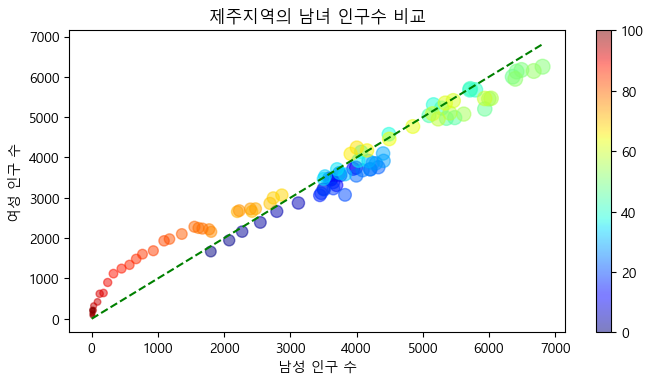

In [34]:
draw_city_gender_pop_bubble('제주')